https://www.analyticssteps.com/blogs/introduction-yolov4   
# Specifying YOLOv4 
- YOLOv4 outruns the existing methods significantly in both terms “detection performance” and “superior speed”. In reference to a paper published, the research team mentions it as a “speedily operating” object detector that can be trained smoothly and used in production systems. 
- The main objective was “to optimize neural networks detector for parallel computations”, the team also introduces various different architectures and architectural selections after attentively analyzing the effects on the performance of numerous detector, features suggested in the previous YOLO models.

**YOLOv4 consists of;**   
**Backbone** CSPDarknet53,   
**Neck:** Spatial Pyramid Pooling additional module, PANet path-aggregation, and    
**Head:** YOLOv3    
- **CSPDarknet53** is a unique backbone that augments the learning capacity of CNN, the spatial pyramid pooling section is attached overhead CSPDarknet53 for improving the receptive field and distinguish the highly important context features. 
- The PANet is deployed in terms of the method for parameter aggregation for distinctive detector levels rather than Feature pyramid networks (FPN) for object detection applied in YOLOv3.   

**Bag of freebies and Bag of specials **  
- Several improvements can be done during the training process such as data augmentation, class imbalance, cost function, etc to increase accuracy, these changes, and improvements don’t show any impact on inference speed and known as “Bag of freebies”.

- Also, such improvements have an impact on the inference time marginally and return in a good performance, known as “Bag of specials”. 

- These improvements also involve increment of the receptive field, the implementation of attention, feature assimilation like skip-connections & FPN, and post-processing like non-maximum elimination.

**Advancement in YOLOv4 in comparison to prior YOLO models;**   
- It is a proficient and authoritative object detection model that allows individuals with a 1080 Ti or 2080 Ti GPU to training a very fast and accurate object detector.

- The consequences of state-of-the-art “Bag-of-Freebies” and “Bag-of-Specials” object detection procedures all the while detector training was confirmed.

- The converted state-of-the-art methods covering CBN (Cross-iteration batch normalization), PAN (Path aggregation network), that are greater skilled and applicable for single GPU training.   
## What YOLOv4 deploys?
**Bag of Freebies for backbone:** 
-  and Mosaic data augmentation, DropBlock regularization, class label smoothing.

**Bag of Freebies for detector:** 
- -loss, CmBN, DropBlock regularization, Mosaic data augmentation, Self-Adversarial Training, Eliminate grid sensitivity, Using multiple anchors for single ground truth, Cosine annealing scheduler, Optimal hyper-parameters,Random training shapes.

“Author’s says;     
The influence of state-of-the-art “Bag-of-Freebies” and “Bag-of-Specials” object detection methods during detector training has been verified     

**Bag of Specials for backbone:**
- Mish activation, Cross-stage partial connections (CSP), Multi-input weighted residual connections (MiWRC).

**Bag of Specials for detector:** 
- Mish activation, SPP-block, SAM-block, PAN path-aggregation block, DIoU-NMS

https://blog.roboflow.com/a-thorough-breakdown-of-yolov4/   
# from roboflow
## The Anatomy of an Object Detector
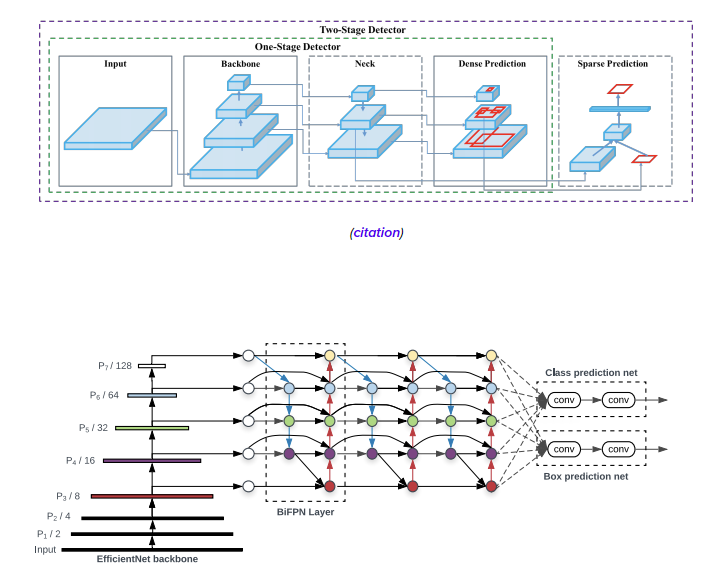
- All object detectors take an image in for input and compress features down through a convolutional neural network backbone. In image classification, these backbones are the end of the network and prediction can be made off of them. 
- In object detection, multiple bounding boxes need to be drawn around images along with classification, so the feature layers of the convolutional backbone need to be mixed and held up in light of one another. 
- The combination of backbone feature layers happens in the neck.

-  is also useful to split object detectors into two categories: one-stage detectors and two stage detectors. Detection happens in the head. 
- **-stage detectors decouple the task of object localization and classification for each bounding box**
- **One-stage detectors make the predictions for object localization and classification at the same time. YOLO is a one-stage detector, hence, You Only Look Once.**

## YOLOv4 Backbone Network - Feature Formation
- The backbone network for an object detector is typically pretrained on ImageNet classification. Pretraining means that the network's weights have already been adapted to identify relevant features in an image, though they will be tweaked in the new task of object detection.

**The authors considered the following backbones for the YOLOv4 object detector**
- i) CSPResNext50
- ii) CSPDarknet53
- iii) EfficientNet-B3



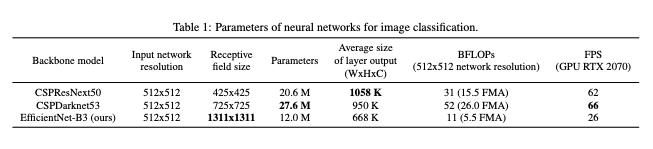
- The CSPResNext50 and the CSPDarknet53 are both based on DenseNet.
- DenseNet was designed to connect layers in convolutional neural networks with the following motivations: to alleviate the vanishing gradient problem (it is hard to backprop loss signals through a very deep network), to bolster feature propagation, encourage the network to reuse features, and reduce the number of network parameters


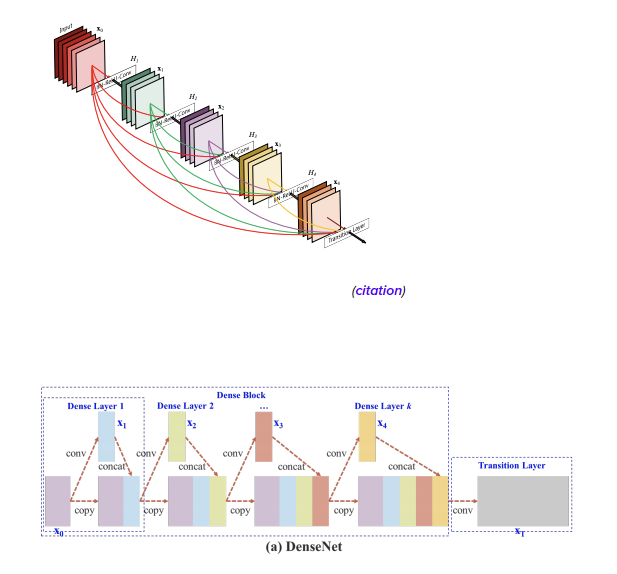
- In CSPResNext50 and CSPDarknet53, the DenseNet has been edited to separate the feature map of the base layer by copying it and sending one copy through the dense block and sending another straight on to the next stage. 
- The idea with the CSPResNext50 and CSPDarknet53 is to remove computational bottlenecks in the DenseNet and improve learning by passing on an unedited version of the feature map.

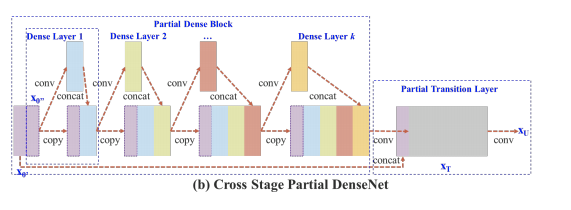
- EfficientNet was designed by Google Brain to primarily study the scaling problem of convolutional neural networks. There are a lot of decisions you can make when scaling up your ConvNet including input size, width scaling, depth scaling, and scaling all of the above. 
- The EfficientNet paper posits that there is an optimal point for all of these and through search, they find it. 

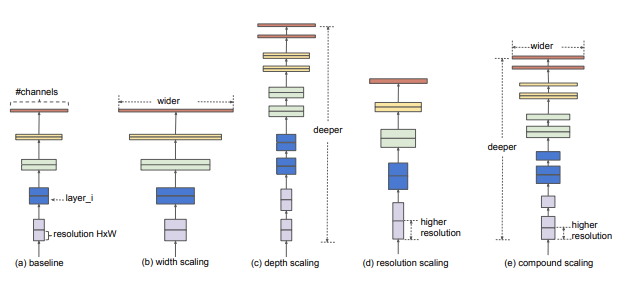
-  outperforms the other networks of comparable size on image classification. The YOLOv4 authors posit, however, that the other networks may work better in the object detection setting and decide to experiment with all of them.

- Based on their intuition and experimental results (aka A LOT of experimental results), the final YOLOv4 network implements CSPDarknet53 for the backbone network.


## YOLOv4 Neck - Feature Aggregation
- The next step in object detection is to mix and combine the features formed in the ConvNet backbone to prepare for the detection step. YOLOv4 considers a few options for the neck including:

i) FPN  
ii) PAN  
iii) NAS-FPN  
iv) BiFPN   
v) ASFF   
vi) SFAM  
-  components of the neck typically flow up and down among layers and connect only the few layers at the end of the convolutional network.
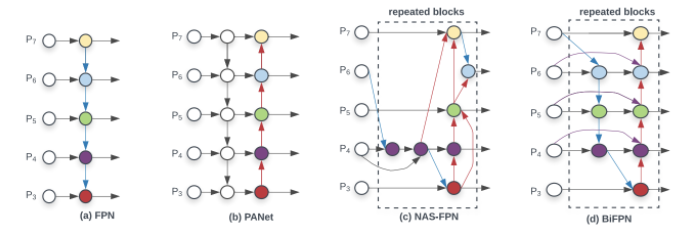
- Each one of the P_i above represents a feature layer in the CSPDarknet53 backbone.

- The image above comes from YOLOv4's predecessor, EfficientDet. Written by Google Brain, EfficientDet uses neural architecture search to find the best form of blocks in the neck portion of the network, arriving at NAS-FPN. The EfficientDet authors then tweak it slightly to the make the more architecture more intuitive (and probably perform better on their development sets).

- YOLOv4 chooses PANet for the feature aggregation of the network. They don't write much on the rationale for this decision, and since NAS-FPN and BiFPN were written concurrently, this is presumably an area of future research.

- Additionally, YOLOv4 adds a SPP block after CSPDarknet53 to increase the receptive field and separate out the most important features from the backbone

## YOLOv4 Head - The Detection Step
- YOLOv4 deploys the same YOLO head as YOLOv3 for detection with the anchor based detection steps, and three levels of detection granularity  
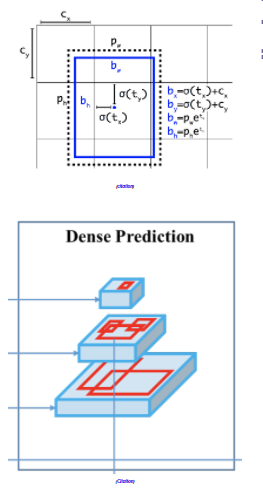


## YOLOv4 - Bag of Freebies 
- YOLOv4 employs a "Bag of Freebies" so termed because they improve performance of the network without adding to inference time in production. Most of the Bag of Freebies have to do with data augmentation.   
-  Using data augmentation in computer vision is very important, and we highly recommend it to get the most performance out of your models. 
- The authors of YOLOv4 use data augmentation to expand the size of their training set and expose the model to semantic situations that it would not have otherwise seen.  
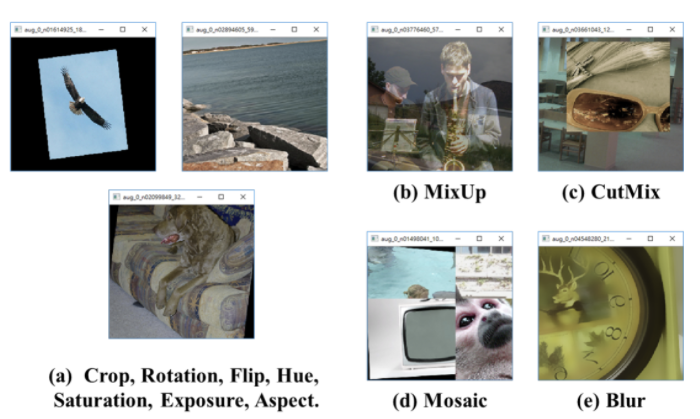
- YOLOv4 is simply verifying their effectiveness. The new contribution is mosaic data augmentation which tiles four images together, teaching the model to find smaller objects and pay less attention to surrounding scenes that are not immediately around the object.

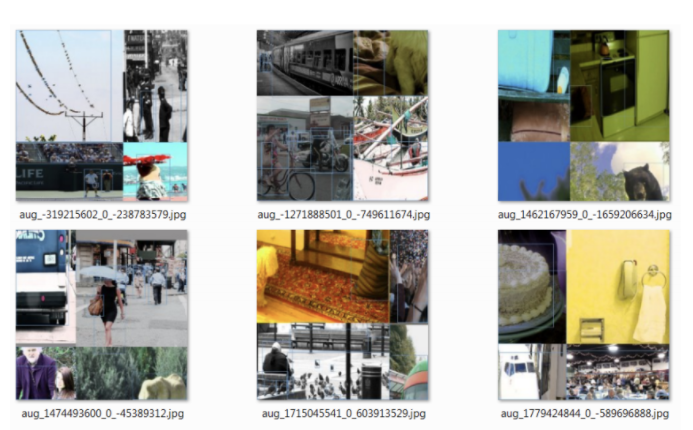
- Another unique contribution the authors make in data augmentation is Self-Adversarial Training (SAT). SAT aims to find the portion of the image that the network most relies on during training, then it edits the image to obscure this reliance, forcing the network to generalize to new features that can help it with detection.

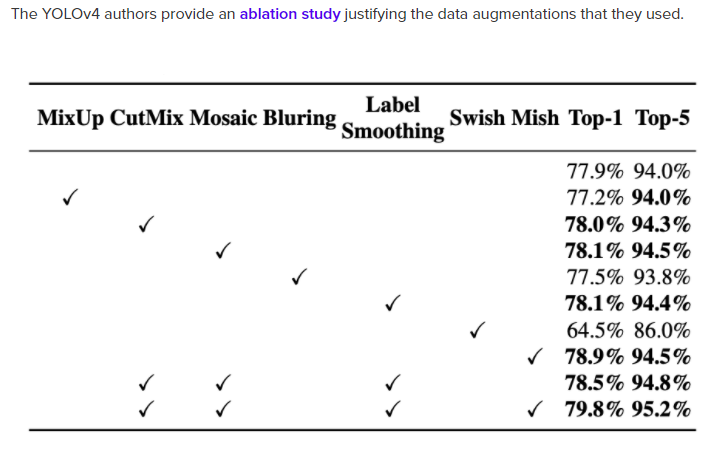

- Another freebie is CIoU loss to edit the loss function. The YOLOv4 authors use CIoU loss, which has to do with the way the predicted bounding box overlaps with the ground truth bounding box. Basically, it is not enough to just look at the overlap, because in the event of no overlap, you also want to look at how close the box was to the ground truth box and encourage the network to pull over the predicted box closer to the ground truth box. Of course, there's a lot of mathematical engineering to that.

## YOLOv4 - Bag of Specials
- YOLOv4 deploys strategies called a "Bag of Specials", so termed because they add marginal increases to inference time but significantly increase performance, so they are considered worth it.

- The authors experiment with various activation functions. Activation functions transform features as they flow through the network. With traditional activation functions like ReLU, it can be difficult to get the network to push feature creations towards their optimal point. So the research has been done to produce functions that marginally improve this process. Mish is an activation function designed to push signals to the left and right.
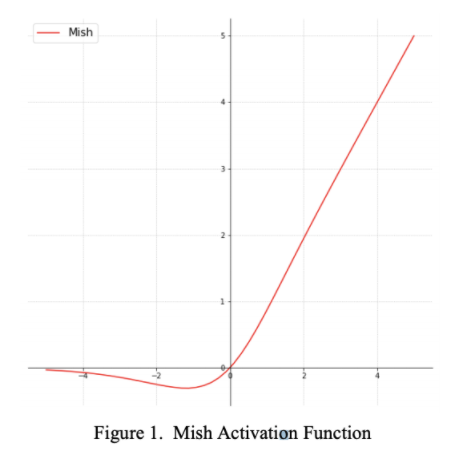
- The authors use DIoU NMS to separate out predicted bounding boxes. The network may predict multiple bounding boxes over a single object, and it would be useful to efficiently pick the best one.

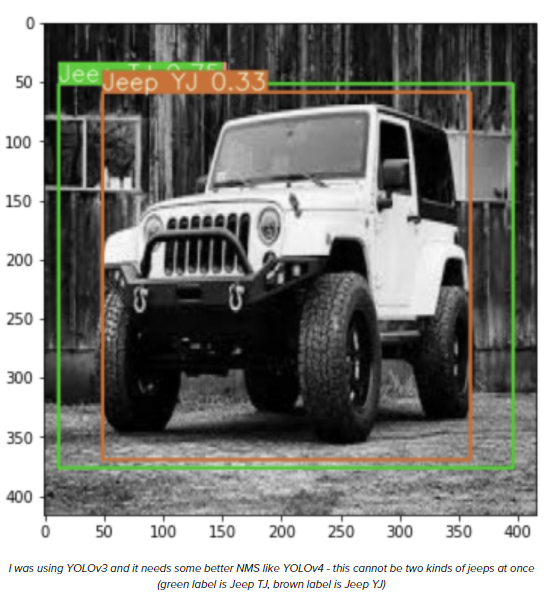
- For batch normalization, the authors use Cross mini-Batch Normalization (CmBN) with the idea that this can be run on any GPU that people use. Many batch normalization techniques require multiple GPUs operating in tandem.

- YOLOv4 uses DropBlock regularization. In DropBlock, sections of the image are hidden from the first layer. DropBlock is a technique to force the network to learn features that it may not otherwise rely upon. For example, you can think of a dog with its head hidden behind a bush. The network should be be able to identify the dog from its torso as well as its head.

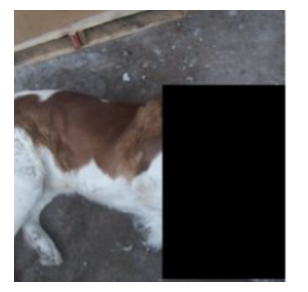
## YOLOv4 - Experimental Results
- The techniques in YOLOv4 were thoroughly proved out via experimentation on MS COCO. COCO contains 80 object classes and is meant to represent a broad range of object detection scenarios that a detector may need to encounter in the wild.

- YOLOv4 does an in depth ablation study on the techniques tried in the paper. An ablation study seeks to remove additions sequentially to prove which additions are improving the network.


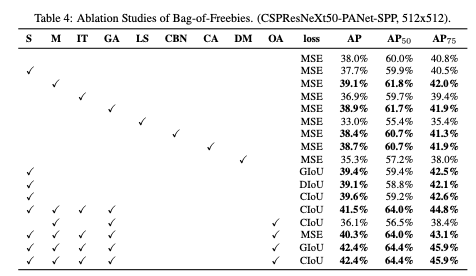
- And with the final configuration, YOLOv4 achieves stat of the art performance for object detection. The paper examines inference time on many different GPUs, though we just display one here.  


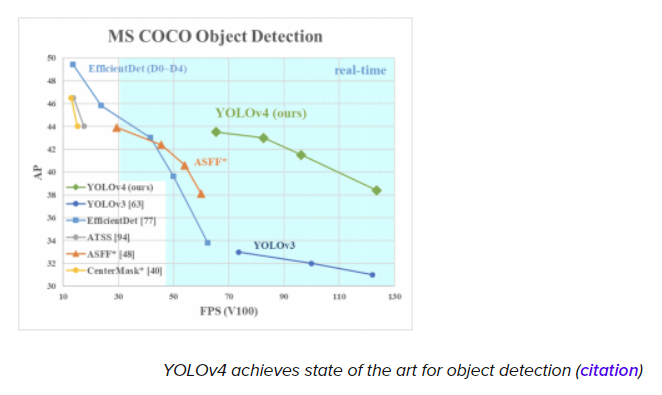